In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [4]:
def synthetic_data(w, b, num_examples):
    '''生成y=Xw+b+噪声'''
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [5]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
f'feature:{features[0]}\nlabel:{labels[0]}'

'feature:tensor([-0.7116,  0.5886])\nlabel:tensor([0.7650])'

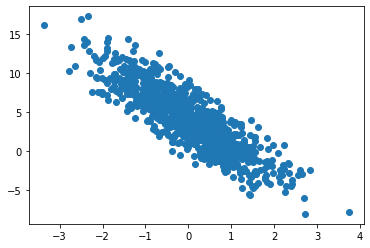

In [8]:
plt.scatter(features[:, 1].numpy(), labels.detach().numpy())
plt.show()

In [9]:
import random
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i: min(i + batch_size, num_examples)])
    yield features[batch_indices], labels[batch_indices]

In [11]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.4795,  0.1367],
        [-0.4695, -1.1391],
        [-1.8615, -0.4816],
        [-1.4281,  0.0106],
        [ 0.6419, -0.2880],
        [-0.2290,  1.4978],
        [ 0.4731, -1.5940],
        [ 1.8783, -1.0815],
        [-0.4722, -1.4077],
        [ 0.1077, -0.9611]]) 
 tensor([[ 2.7836],
        [ 7.1231],
        [ 2.1227],
        [ 1.2991],
        [ 6.4612],
        [-1.3587],
        [10.5591],
        [11.6270],
        [ 8.0404],
        [ 7.6859]])


In [27]:
#初始化参数 
#w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
w = torch.tensor([0., 0.], requires_grad=True)
b = torch.zeros(1, requires_grad=True)
w, b

(tensor([0., 0.], requires_grad=True), tensor([0.], requires_grad=True))

In [17]:
#定义模型
def linreg(X, w, b):
    return torch.matmul(X, w) + b
#损失函数
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2
#优化算法
def sgd(params, lr, batch_size):
    '''小批量随机梯度下降'''
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()
            

In [29]:
lr = 0.003
num_epochs = 200
net = linreg
loss = squared_loss
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch+1},loss {float(train_l.mean()):f}')
print(f'w的估计误差:{true_w - w.reshape(true_w.shape)}\nb的估计误差：{true_b-b}')

epoch 1,loss 0.000159
epoch 2,loss 0.000158
epoch 3,loss 0.000158
epoch 4,loss 0.000157
epoch 5,loss 0.000156
epoch 6,loss 0.000155
epoch 7,loss 0.000155
epoch 8,loss 0.000155
epoch 9,loss 0.000154
epoch 10,loss 0.000153
epoch 11,loss 0.000152
epoch 12,loss 0.000151
epoch 13,loss 0.000151
epoch 14,loss 0.000150
epoch 15,loss 0.000150
epoch 16,loss 0.000149
epoch 17,loss 0.000149
epoch 18,loss 0.000149
epoch 19,loss 0.000148
epoch 20,loss 0.000147
epoch 21,loss 0.000147
epoch 22,loss 0.000146
epoch 23,loss 0.000146
epoch 24,loss 0.000145
epoch 25,loss 0.000145
epoch 26,loss 0.000144
epoch 27,loss 0.000143
epoch 28,loss 0.000143
epoch 29,loss 0.000142
epoch 30,loss 0.000142
epoch 31,loss 0.000141
epoch 32,loss 0.000141
epoch 33,loss 0.000141
epoch 34,loss 0.000140
epoch 35,loss 0.000139
epoch 36,loss 0.000138
epoch 37,loss 0.000138
epoch 38,loss 0.000137
epoch 39,loss 0.000137
epoch 40,loss 0.000136
epoch 41,loss 0.000136
epoch 42,loss 0.000135
epoch 43,loss 0.000135
epoch 44,loss 0.0001

In [33]:
#API简介实现线性回归
from torch.utils import data
def load_array(data_arrays, batch_size, is_train=True):
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)
batch_size = 10
data_iter = load_array((features, labels), batch_size)
next(iter(data_iter))

[tensor([[ 0.5136, -1.7730],
         [ 1.7381,  1.2246],
         [-0.9184, -0.2634],
         [-0.5528,  0.5324],
         [-0.3762,  0.0960],
         [-1.4314,  0.1274],
         [-2.6753, -0.1933],
         [ 1.4843,  2.8269],
         [ 1.5765,  1.0812],
         [ 0.0989,  2.1650]]),
 tensor([[11.2526],
         [ 3.5265],
         [ 3.2486],
         [ 1.2731],
         [ 3.1381],
         [ 0.8914],
         [-0.4858],
         [-2.4550],
         [ 3.6915],
         [-2.9537]])]

In [34]:
from torch import nn
net = nn.Sequential(nn.Linear(2, 1))

In [38]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [39]:
loss = nn.MSELoss()
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

In [40]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000247
epoch 2, loss 0.000094
epoch 3, loss 0.000093


In [41]:
w = net[0].weight.data

b = net[0].bias.data
print(f'w的估计误差:{true_w - w.reshape(true_w.shape)}\nb的估计误差：{true_b-b}')

w的估计误差:tensor([-0.0002, -0.0003])
b的估计误差：tensor([0.0006])
